In [1]:
import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
flights = pl.read_csv('data/flights.csv')
# flights.head(10)

In [3]:
X = flights.drop('ARRIVAL_DELAY')
y = flights['ARRIVAL_DELAY']

In [4]:
print(f"Column names: {flights.columns}")
print(f"Number of rows and columns: {flights.shape}")
# for column in flights.columns:
#     datatype = flights[column].dtype
#     print(f"Column: {column}, Data type: {datatype}")

Column names: ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
Number of rows and columns: (5819079, 31)


In [5]:
# print(y.describe())
# # Should I be dropping all rows with nulls? Yes
# plt.figure(figsize=(10,6))
# plt.hist(y.drop_nulls(), bins=25)
# plt.xlabel('Arrival Delay')
# plt.ylabel('Frequency')
# plt.title('Histogram of Arrival Delay')
# plt.show()
# # same plot but in log space
# plt.figure(figsize=(10,6))
# plt.hist(y.drop_nulls(), bins=25, log=True)
# plt.xlabel('Arrival Delay')
# plt.ylabel('Frequency (log scale)')
# plt.title('Histogram of Arrival Delay (Log Scale)')
# plt.show()

In [86]:
# categorical_columns = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DIVERTED', 'CANCELLED']
# for column in categorical_columns:
#     counts = flights[column].value_counts().head(20) # Sort origin and destination
#     plt.figure(figsize=(10,6))
#     plt.bar(counts[column], counts['count'])
#     if (column == 'DIVERTED' or column == 'CANCELLED'):
#         plt.title(f'Bar Chart of {column}')
#     else:
#         plt.title(f'Bar Chart of {column} (Top 20)')
#     plt.xlabel(column)
#     plt.xticks(rotation=90)
#     plt.ylabel('Count')
#     plt.show()

In [87]:
# continuous_columns = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
# for column in continuous_columns:
#     plt.figure(figsize=(10,6))
#     plt.hist(flights[column].drop_nulls(), bins=25)
#     plt.xlabel(f'{column}')
#     plt.ylabel('Frequency')
#     plt.title(f'Histogram of {column}')
#     plt.show()

In [30]:
# for column in continuous_columns:
#     plt.figure(figsize=(10,6))
#     plt.scatter(flights[column].filter(y.is_not_null()), y.drop_nulls(), alpha=0.5)
#     plt.xlabel(f'{column}')
#     plt.ylabel('ARRIVAL_DELAY')
#     plt.title(f'Scatter Plot of {column} vs ARRIVAL_DELAY')
#     plt.show()

In [88]:
# plt.figure(figsize=(12,8))
# airline_delays = []
# airlines = flights['AIRLINE'].unique().to_list()
# for airline in airlines:
#     delays = y.filter(flights['AIRLINE'] == airline).drop_nulls().to_list()
#     airline_delays.append(delays)
# plt.violinplot(airline_delays, showmeans=True)
# plt.xticks(ticks=np.arange(1, len(airlines)+1), labels=airlines, rotation=90)
# plt.xlabel('AIRLINE')
# plt.ylabel('ARRIVAL_DELAY')
# plt.title('Violin Plot of Arrival Delays by Airline')
# plt.show()

In [89]:
# plt.figure(figsize=(12,8))
# airline_delays = []
# airlines = flights['AIRLINE'].unique().to_list()
# for airline in airlines:
#     delays = y.filter((flights['AIRLINE'] == airline) & (y > -60) & (y < 120)).drop_nulls().to_list()
#     airline_delays.append(delays)
# plt.violinplot(airline_delays, showmeans=True)
# plt.xticks(ticks=np.arange(1, len(airlines)+1), labels=airlines, rotation=90)
# plt.xlabel('AIRLINE')
# plt.ylabel('ARRIVAL_DELAY (Filtered)')
# plt.title('Violin Plot of Arrival Delays by Airline (Filtered)')
# plt.show()

In [6]:
# drop all rows where ARRIVAL_DELAY is null
X_old = X
y_old = y
X = X.filter(y.is_not_null())
y = y.drop_nulls()
# fraction of rows dropped
rows_dropped = X_old.height - X.height
print(f"Rows dropped due to null ARRIVAL_DELAY: {rows_dropped} ({rows_dropped / X_old.height:.2%})")


Rows dropped due to null ARRIVAL_DELAY: 105071 (1.81%)


In [7]:
for column in X.columns:
    missing_count = X[column].is_null().sum()
    print(f"Column: {column}, Missing values in training set: {missing_count}")

Column: YEAR, Missing values in training set: 0
Column: MONTH, Missing values in training set: 0
Column: DAY, Missing values in training set: 0
Column: DAY_OF_WEEK, Missing values in training set: 0
Column: AIRLINE, Missing values in training set: 0
Column: FLIGHT_NUMBER, Missing values in training set: 0
Column: TAIL_NUMBER, Missing values in training set: 0
Column: ORIGIN_AIRPORT, Missing values in training set: 0
Column: DESTINATION_AIRPORT, Missing values in training set: 0
Column: SCHEDULED_DEPARTURE, Missing values in training set: 0
Column: DEPARTURE_TIME, Missing values in training set: 0
Column: DEPARTURE_DELAY, Missing values in training set: 0
Column: TAXI_OUT, Missing values in training set: 0
Column: WHEELS_OFF, Missing values in training set: 0
Column: SCHEDULED_TIME, Missing values in training set: 0
Column: ELAPSED_TIME, Missing values in training set: 0
Column: AIR_TIME, Missing values in training set: 0
Column: DISTANCE, Missing values in training set: 0
Column: WHEEL

In [8]:
# how many missing values in each column now?
too_many_missing  = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
for column in too_many_missing:
    missing_count = X[column].is_null().sum()
    total_count = X.height
    print(f"Column: {column}, Missing values: {missing_count} ({missing_count / total_count:.2%})")

Column: CANCELLATION_REASON, Missing values: 5714008 (100.00%)
Column: AIR_SYSTEM_DELAY, Missing values: 4650569 (81.39%)
Column: SECURITY_DELAY, Missing values: 4650569 (81.39%)
Column: AIRLINE_DELAY, Missing values: 4650569 (81.39%)
Column: LATE_AIRCRAFT_DELAY, Missing values: 4650569 (81.39%)
Column: WEATHER_DELAY, Missing values: 4650569 (81.39%)


In [9]:
# Drop these columns because cancellation reason is always missing, and the other delay columns won't be available at inference time
X = X.drop(too_many_missing)

In [10]:
# Remove data that provides information leakage
leakage_columns = ['WHEELS_OFF', 'WHEELS_ON', 'ARRIVAL_TIME', 'TAXI_IN', 'AIR_TIME', 'ELAPSED_TIME']
X = X.drop(leakage_columns)

In [11]:
from sklearn.model_selection import train_test_split    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [12]:
# Too many airports, so we need to limit to top 20 most frequent, and group the rest as "Other"
for col in ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']:
    top20 = X_train[col].value_counts().sort(by='count', descending=True).head(20)[col].to_list()

    X_train = X_train.with_columns(
        pl.when(pl.col(col).cast(pl.Utf8).is_in(top20))
            .then(pl.col(col).cast(pl.Utf8))
            .otherwise(pl.lit("Other"))
            .alias(col)
    )
    X_test = X_test.with_columns(
        pl.when(pl.col(col).cast(pl.Utf8).is_in(top20))
            .then(pl.col(col).cast(pl.Utf8))
            .otherwise(pl.lit("Other"))
            .alias(col)
    )
    X_val = X_val.with_columns(
        pl.when(pl.col(col).cast(pl.Utf8).is_in(top20))
            .then(pl.col(col).cast(pl.Utf8))
            .otherwise(pl.lit("Other"))
            .alias(col)
    )

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_columns = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DIVERTED', 'CANCELLED'] 
continuous_columns = ['DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME', 'DISTANCE'] 
temporal_columns = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=True, handle_unknown='ignore'))
])
continuous_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
temporal_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
pipeline = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('cont', continuous_transformer, continuous_columns),
        ('temp', temporal_transformer, temporal_columns)
    ]
)

In [14]:
X_train_prep = pipeline.fit_transform(X_train.to_pandas())
X_val_prep = pipeline.transform(X_val.to_pandas())
X_test_prep = pipeline.transform(X_test.to_pandas())

In [15]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import root_mean_squared_error, r2_score 
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# ElasticNet

In [16]:
# train on 1% of training data and validate on 1% of validation data, using multiple random states for CV
random_states = [17, 42, 774, 1012]
N = X_train_prep.shape[0]
sample_size = int(0.02 * N)
cv_splits = []
train_indices = np.arange(N)
for rs in random_states:
    rng = np.random.RandomState(rs)
    idx = rng.choice(train_indices, size=sample_size, replace=False)
    train_idx = idx[:sample_size // 2]
    val_idx = idx[sample_size // 2:]

    cv_splits.append((train_idx, val_idx))


==== (Random State 17) ====
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best parameters for random state 17: {'alpha': np.float64(0.01), 'l1_ratio': np.float64(1.0)}
Validation RMSE: 9.5998
Validation R2: 0.9402
==== (Random State 42) ====
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best parameters for random state 42: {'alpha': np.float64(0.01), 'l1_ratio': np.float64(1.0)}
Validation RMSE: 9.6030
Validation R2: 0.9402
==== (Random State 774) ====
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best parameters for random state 774: {'alpha': np.float64(0.01), 'l1_ratio': np.float64(1.0)}
Validation RMSE: 9.6018
Validation R2: 0.9402
==== (Random State 1012) ====
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best parameters for random state 1012: {'alpha': np.float64(0.01), 'l1_ratio': np.float64(1.0)}
Validation RMSE: 9.6013
Validation R2: 0.9402


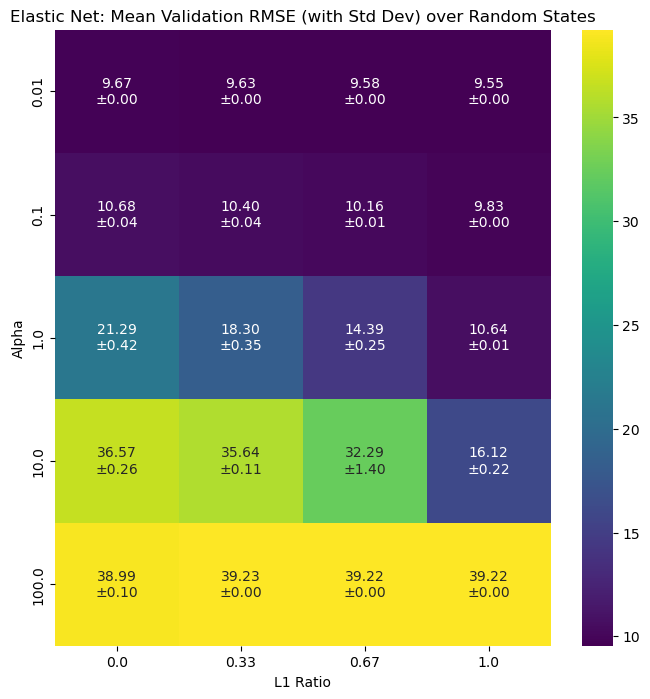

In [17]:
from sklearn.model_selection import KFold 
import seaborn as sns

# Linear Regression
elastic_net_models = {}
elastic_net_grids = {}
for rs in random_states:
    print(f'==== (Random State {rs}) ====')
    elastic_net = SGDRegressor(max_iter=10000, random_state=rs, penalty='elasticnet')
    param_grid = {
        'alpha': np.logspace(-2, 2, 5),
        'l1_ratio': np.linspace(0, 1, 4)
    }
    grid_elastic_net = GridSearchCV(elastic_net, param_grid, cv=cv_splits, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=True, n_jobs=1)
    grid_elastic_net.fit(X_train_prep, y_train.to_numpy())
    print(f"Best parameters for random state {rs}: {grid_elastic_net.best_params_}")
    best_model_elastic_net = grid_elastic_net.best_estimator_
    y_val_pred = best_model_elastic_net.predict(X_val_prep)
    rmse = root_mean_squared_error(y_val.to_numpy(), y_val_pred)
    r2 = r2_score(y_val.to_numpy(), y_val_pred)
    print(f"Validation RMSE: {rmse:.4f}")
    print(f"Validation R2: {r2:.4f}")
    elastic_net_models[rs] = best_model_elastic_net
    elastic_net_grids[rs] = grid_elastic_net

# mean and std over random states
all_means = np.zeros((5, 4, len(random_states)))
alpha_values = np.logspace(-2, 2, 5)
l1_ratio_values = np.linspace(0, 1, 4)
for k, rs in enumerate(random_states):
    grid_elastic_net = elastic_net_grids[rs]
    results = pd.DataFrame(grid_elastic_net.cv_results_)
    pivot_table = results.pivot(index='param_alpha', columns='param_l1_ratio', values='mean_test_score')
    for i, alpha in enumerate(alpha_values):
        for j, l1_ratio in enumerate(l1_ratio_values):
            all_means[i, j, k] = pivot_table.loc[alpha, l1_ratio]
mean_test_scores = np.mean(all_means, axis=2)
std_test_scores = np.std(all_means, axis=2)

# plot heatmap of mean and std
labels = np.empty(mean_test_scores.shape, dtype=object)
for i in range(mean_test_scores.shape[0]):
    for j in range(mean_test_scores.shape[1]):
        labels[i, j] = f"{-mean_test_scores[i, j]:.2f}\n±{std_test_scores[i, j]:.2f}"
plt.figure(figsize=(8,8))
sns.heatmap(-mean_test_scores, annot=labels, fmt='', xticklabels=np.round(l1_ratio_values, 2), yticklabels=np.round(alpha_values, 2), cmap='viridis')
plt.title('Elastic Net: Mean Validation RMSE (with Std Dev) over Random States')
plt.xlabel('L1 Ratio')
plt.ylabel('Alpha')
plt.show()


In [18]:
# calculate mean and std of validation RMSE across different random states
rmse_list = []
for rs in random_states:
    model = elastic_net_models[rs]
    y_val_pred = model.predict(X_val_prep)
    rmse = root_mean_squared_error(y_val.to_numpy(), y_val_pred)
    rmse_list.append(rmse)
mean_rmse = np.mean(rmse_list)
std_rmse = np.std(rmse_list)
print(f"Mean Validation RMSE across random states: {mean_rmse:.4f}")
print(f"Std Dev of Validation RMSE across random states: {std_rmse:.4f}")
elastic_net_random_state = random_states[np.argmin(rmse_list)]

Mean Validation RMSE across random states: 9.6015
Std Dev of Validation RMSE across random states: 0.0012


rmse mean: 9.604910448329278, rmse std: 0.005118118148681758


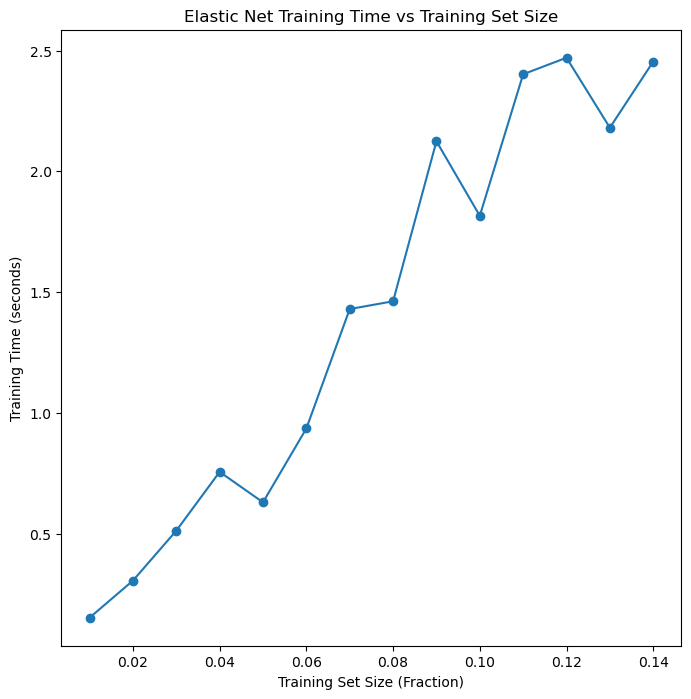

In [19]:
# train final model on successively larger subsets of the training data and evaluate on val set
import time
elastic_net_train_sizes = np.linspace(0.01, 0.14, 14)
elastic_net_train_times = {}
elastic_net_final_model = SGDRegressor(max_iter=10000, random_state=elastic_net_random_state, penalty='elasticnet')
elastic_net_best_params = elastic_net_grids[elastic_net_random_state].best_params_
elastic_net_final_model.set_params(**elastic_net_best_params)
rmse_list = []

for train_size in elastic_net_train_sizes:
    elastic_net_train_times[train_size] = []
    for trial in range(3):  # 3 trials for each train size
        subset_size = int(train_size * X_train_prep.shape[0])
        random_indices = np.random.choice(X_train_prep.shape[0], size=subset_size, replace=False)
        X_train_subset = X_train_prep[random_indices]
        y_train_subset = y_train.to_numpy()[random_indices]
        
        start_time = time.time()
        elastic_net_final_model.fit(X_train_subset, y_train_subset)
        end_time = time.time()
        train_time = end_time - start_time
        elastic_net_train_times[train_size].append(train_time)
        
        y_val_pred = elastic_net_final_model.predict(X_val_prep)
        rmse = root_mean_squared_error(y_val.to_numpy(), y_val_pred)
        r2 = r2_score(y_val.to_numpy(), y_val_pred)
        rmse_list.append(rmse)

print(f"rmse mean: {np.mean(rmse_list)}, rmse std: {np.std(rmse_list)}")
# plot training time vs train size
plt.figure(figsize=(8,8))
plt.plot(elastic_net_train_sizes, [np.mean(elastic_net_train_times[size]) for size in elastic_net_train_sizes], marker='o')
plt.xlabel('Training Set Size (Fraction)')
plt.ylabel('Training Time (seconds)')
plt.title('Elastic Net Training Time vs Training Set Size')
plt.show()


In [20]:
# final training on full training set and evaluation on test set
elastic_net_final_model.fit(X_train_prep, y_train.to_numpy())
y_test_pred = elastic_net_final_model.predict(X_test_prep)
rmse_test = root_mean_squared_error(y_test.to_numpy(), y_test_pred)
r2_test = r2_score(y_test.to_numpy(), y_test_pred)
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R2: {r2_test:.4f}")

Test RMSE: 9.5827
Test R2: 0.9404


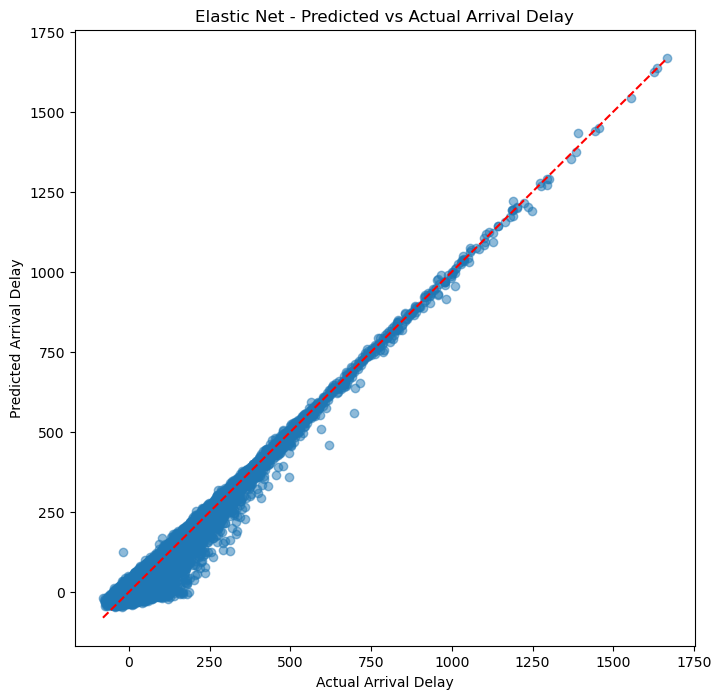

In [21]:
# scatter plot of predicted vs actual for all best models
plt.figure(figsize=(8,8))
y_test_pred = elastic_net_final_model.predict(X_test_prep)
plt.scatter(y_test.to_numpy(), y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title(f'Elastic Net - Predicted vs Actual Arrival Delay')
plt.show()


In [22]:
import warnings
from scipy.sparse import SparseEfficiencyWarning

warnings.simplefilter("ignore", SparseEfficiencyWarning)

# perturbation analysis
def sparse_permutation_importance(model, X, y, n_repeats=3, random_state=42):
    rng = np.random.RandomState(random_state)
    # Convert once
    X_csc = X.tocsc(copy=True)
    # Baseline RMSE
    baseline_rmse = root_mean_squared_error(y, model.predict(X_csc))
    n_cols = X_csc.shape[1]
    importances = np.zeros((n_cols, n_repeats))
    for col in range(n_cols):
        if col % 30 == 0:
            print(f"Processing column {col}/{n_cols}")
        # Extract dense col
        original_col = X_csc[:, col].toarray().ravel()
        for n in range(n_repeats):
            shuffled = original_col.copy()
            rng.shuffle(shuffled)
            # ===== Efficient in-place replace =====
            X_csc[:, col] = shuffled.reshape(-1, 1)
            # Evaluate
            pred = model.predict(X_csc)
            rmse = root_mean_squared_error(y, pred)
            importances[col, n] = rmse
            # ===== Restore original column =====
            X_csc[:, col] = original_col.reshape(-1, 1)
    return {
        "importances": importances,
        "importances_mean": importances.mean(axis=1),
        "importances_std": importances.std(axis=1),
        "baseline_rmse": baseline_rmse
    }


# use 1% of test set
X_test_sample = X_test_prep[:int(0.01 * X_test_prep.shape[0])]
y_test_sample = y_test.to_numpy()[:int(0.01 * y_test.shape[0])]

perturbation_results = sparse_permutation_importance(elastic_net_final_model, X_test_sample, y_test_sample, n_repeats=3, random_state=42)
importances = perturbation_results['importances']
importances_mean = perturbation_results['importances_mean']
importances_std = perturbation_results['importances_std']

Processing column 0/65
Processing column 30/65
Processing column 60/65


<Figure size 1000x600 with 0 Axes>

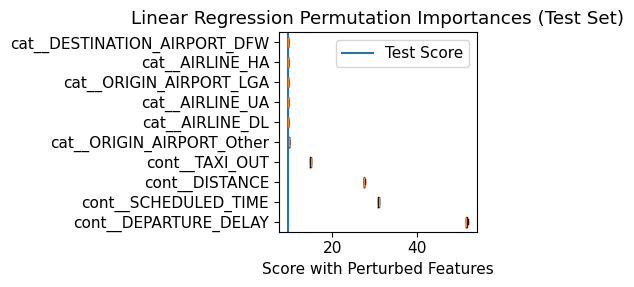

In [23]:
# get feature names from pipeline
feature_names = pipeline.get_feature_names_out()
rmse_test_sample = root_mean_squared_error(y_test_sample, elastic_net_final_model.predict(X_test_sample))
# sort importances
sorted_indices = np.argsort(importances_mean)[::-1]
top_10 = sorted_indices[:10]
# plot top 20 feature importances
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(5,3))
plt.boxplot(importances[top_10].T,tick_labels=feature_names[top_10],vert=False)
plt.axvline(rmse_test_sample,label='Test Score')
plt.title("Linear Regression Permutation Importances (Test Set)")
plt.xlabel('Score with Perturbed Features')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Save model
import joblib
joblib.dump(elastic_net_final_model, 'models/final_model_elastic_net.pkl')



['models/final_model_elastic_net.pkl']

# SVM

==== (Random State 17) ====
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.

Best parameters for random state 42: {'C': 1, 'epsilon': 0, 'max_iter': 1000}
Validation RMSE: 9.6538
Validation R2: 0.9396
==== (Random State 42) ====
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.

Best parameters for random state 42: {'C': 1, 'epsilon': 0, 'max_iter': 1000}
Validation RMSE: 9.6581
Validation R2: 0.9395
==== (Random State 774) ====
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.

Best parameters for random state 42: {'C': 0.1, 'epsilon': 0, 'max_iter': 1000}
Validation RMSE: 9.6585
Validation R2: 0.9395
==== (Random State 1012) ====
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.

Best parameters for random state 42: {'C': 100, 'epsilon': 0, 'max_iter': 1000}
Validation RMSE: 9.6371
Validation R2: 0.9398


/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


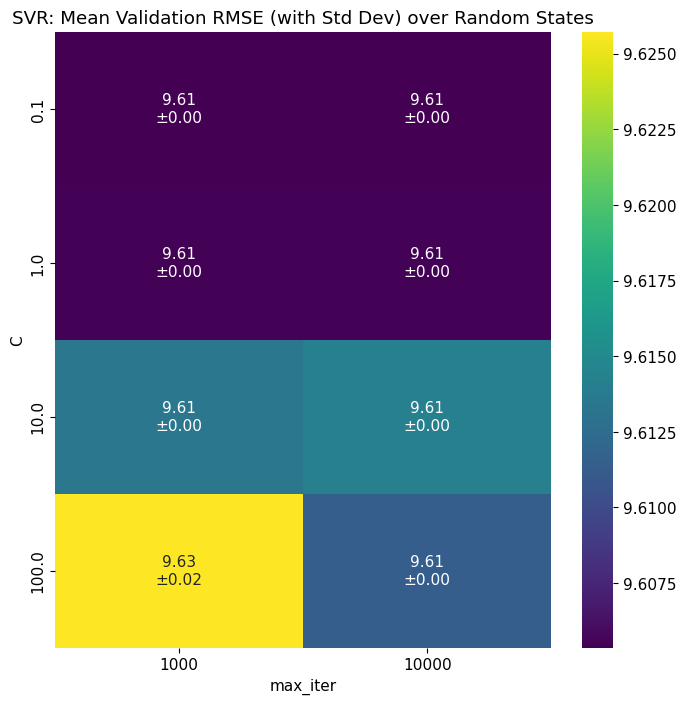

In [25]:
# Support Vector Regression
svm_models = {}
svm_grids = {}
for rs in random_states:
    print(f'==== (Random State {rs}) ====')
    svm = LinearSVR(max_iter=10000, random_state=rs)
    param_grid_svr = {
        'C': [0.1, 1, 10, 100],
        'epsilon': [0],
        'max_iter': [1000, 10000]
    }

    grid_svm = GridSearchCV(svm, param_grid_svr, cv=cv_splits, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=True, n_jobs=1)
    grid_svm.fit(X_train_prep, y_train.to_numpy())
    print(f"Best parameters for random state 42: {grid_svm.best_params_}")
    best_model_svm = grid_svm.best_estimator_
    y_val_pred = best_model_svm.predict(X_val_prep)
    rmse = root_mean_squared_error(y_val.to_numpy(), y_val_pred)
    r2 = r2_score(y_val.to_numpy(), y_val_pred)
    print(f"Validation RMSE: {rmse:.4f}")
    print(f"Validation R2: {r2:.4f}")
    svm_models[rs] = best_model_svm
    svm_grids[rs] = grid_svm

# mean and std over random states
all_means = np.zeros((4, 2, len(random_states)))
C_values = [0.1, 1, 10, 100]
max_iter_values = [1000, 10000]
for k, rs in enumerate(random_states):
    grid_svm = svm_grids[rs]
    results = pd.DataFrame(grid_svm.cv_results_)
    pivot_table = results.pivot(index='param_C', columns='param_max_iter', values='mean_test_score')
    for i, C in enumerate(C_values):
        for j, max_iter in enumerate(max_iter_values):
            all_means[i, j, k] = pivot_table.loc[C, max_iter]
mean_test_scores = np.mean(all_means, axis=2)
std_test_scores = np.std(all_means, axis=2)

# plot heatmap of mean and std
labels = np.empty(mean_test_scores.shape, dtype=object)
for i in range(mean_test_scores.shape[0]):
    for j in range(mean_test_scores.shape[1]):
        labels[i, j] = f"{-mean_test_scores[i, j]:.2f}\n±{std_test_scores[i, j]:.2f}"
plt.figure(figsize=(8,8))
sns.heatmap(-mean_test_scores, annot=labels, fmt='', xticklabels=np.round(max_iter_values, 2), yticklabels=np.round(C_values, 2), cmap='viridis')
plt.title('SVR: Mean Validation RMSE (with Std Dev) over Random States')
plt.xlabel('max_iter')
plt.ylabel('C')
plt.show()

In [26]:
# calculate mean and std of validation RMSE across different random states
rmse_list = []
for rs in random_states:
    model = svm_models[rs]
    y_val_pred = model.predict(X_val_prep)
    rmse = root_mean_squared_error(y_val.to_numpy(), y_val_pred)
    rmse_list.append(rmse)
mean_rmse = np.mean(rmse_list)
std_rmse = np.std(rmse_list)
print(f"Mean Validation RMSE across random states: {mean_rmse:.4f}")
print(f"Std Dev of Validation RMSE across random states: {std_rmse:.4f}")
svm_random_state = random_states[np.argmin(rmse_list)]

Mean Validation RMSE across random states: 9.6519
Std Dev of Validation RMSE across random states: 0.0087


/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/data1030env/lib/python3.

rmse mean: 9.673488704275838, rmse std: 0.03836406597881422


/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


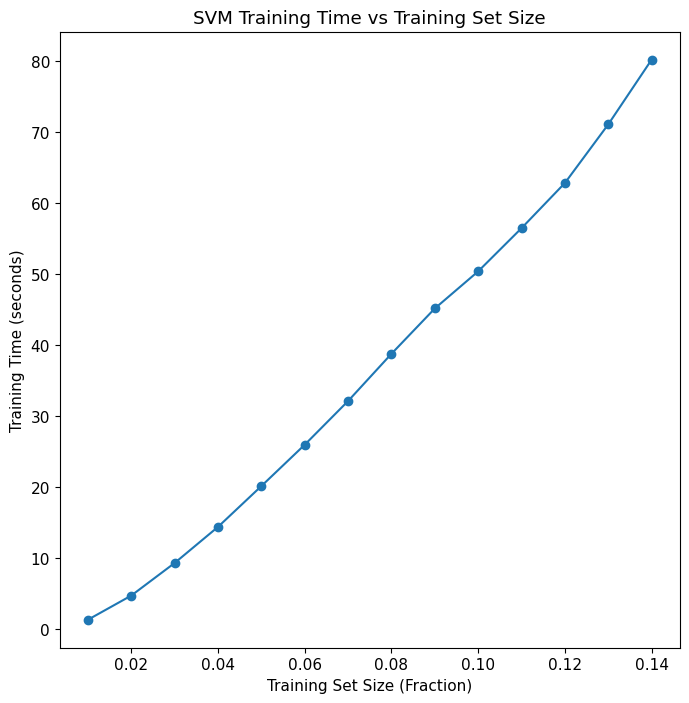

In [27]:
# train final model on successively larger subsets of the training data and evaluate on val set
svm_train_sizes = np.linspace(0.01, 0.14, 14)
svm_train_times = {}
svm_final_model = LinearSVR(max_iter=10000, random_state=svm_random_state)
svm_best_params = svm_grids[svm_random_state].best_params_
svm_final_model.set_params(**svm_best_params)
rmse_list = []

for train_size in svm_train_sizes:
    svm_train_times[train_size] = []
    for trial in range(3):  # 3 trials for each train size
        subset_size = int(train_size * X_train_prep.shape[0])
        random_indices = np.random.choice(X_train_prep.shape[0], size=subset_size, replace=False)
        X_train_subset = X_train_prep[random_indices]
        y_train_subset = y_train.to_numpy()[random_indices]
        
        start_time = time.time()
        svm_final_model.fit(X_train_subset, y_train_subset)
        end_time = time.time()
        train_time = end_time - start_time
        svm_train_times[train_size].append(train_time)
        
        y_val_pred = svm_final_model.predict(X_val_prep)
        rmse = root_mean_squared_error(y_val.to_numpy(), y_val_pred)
        r2 = r2_score(y_val.to_numpy(), y_val_pred)
        rmse_list.append(rmse)

print(f"rmse mean: {np.mean(rmse_list)}, rmse std: {np.std(rmse_list)}")
# plot training time vs train size
plt.figure(figsize=(8,8))
plt.plot(svm_train_sizes, [np.mean(svm_train_times[size]) for size in svm_train_sizes], marker='o')
plt.xlabel('Training Set Size (Fraction)')
plt.ylabel('Training Time (seconds)')
plt.title('SVM Training Time vs Training Set Size')
plt.show()


In [28]:
# final training on full training set and evaluation on test set
svm_final_model.fit(X_train_prep, y_train.to_numpy())
y_test_pred = svm_final_model.predict(X_test_prep)
rmse_test = root_mean_squared_error(y_test.to_numpy(), y_test_pred)
r2_test = r2_score(y_test.to_numpy(), y_test_pred)
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R2: {r2_test:.4f}")

Test RMSE: 9.6204
Test R2: 0.9399


/opt/miniconda3/envs/data1030env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


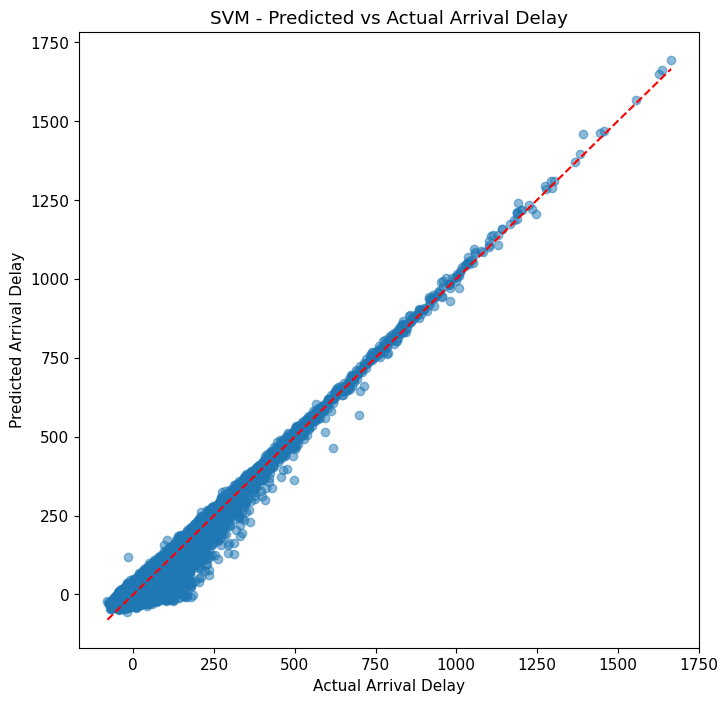

In [29]:
# scatter plot of predicted vs actual for all best models
y_test_pred = svm_final_model.predict(X_test_prep)
plt.figure(figsize=(8,8))
plt.scatter(y_test.to_numpy(), y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title(f'SVM - Predicted vs Actual Arrival Delay')
plt.show()

In [30]:
# use 1% of test set
X_test_sample = X_test_prep[:int(0.01 * X_test_prep.shape[0])]
y_test_sample = y_test.to_numpy()[:int(0.01 * y_test.shape[0])]

perturbation_results = sparse_permutation_importance(svm_final_model, X_test_sample, y_test_sample, n_repeats=3, random_state=42)
importances = perturbation_results['importances']
importances_mean = perturbation_results['importances_mean']
importances_std = perturbation_results['importances_std']

Processing column 0/65
Processing column 30/65
Processing column 60/65


<Figure size 1000x600 with 0 Axes>

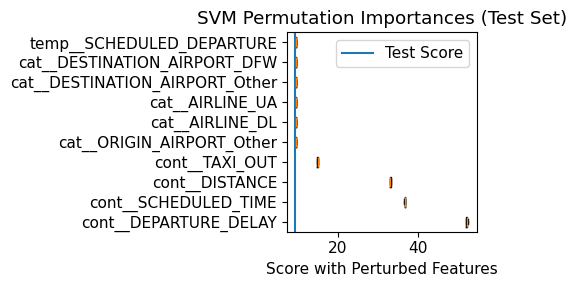

In [31]:
# get feature names from pipeline
feature_names = pipeline.get_feature_names_out()
rmse_test_sample = root_mean_squared_error(y_test_sample, svm_final_model.predict(X_test_sample))
# sort importances
sorted_indices = np.argsort(importances_mean)[::-1]
top_10 = sorted_indices[:10]
# plot top 20 feature importances
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(5,3))
plt.boxplot(importances[top_10].T,tick_labels=feature_names[top_10],vert=False)
plt.axvline(rmse_test_sample,label='Test Score')
plt.title("SVM Permutation Importances (Test Set)")
plt.xlabel('Score with Perturbed Features')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
joblib.dump(svm_final_model, 'models/final_model_svm.pkl')

['models/final_model_svm.pkl']

# Decision Tree

==== (Random State 17) ====
Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best parameters for random state 17: {'max_depth': 7}
Validation RMSE: 11.0190
Validation R2: 0.9213
==== (Random State 42) ====
Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best parameters for random state 42: {'max_depth': 10}
Validation RMSE: 10.5218
Validation R2: 0.9282
==== (Random State 774) ====
Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best parameters for random state 774: {'max_depth': 10}
Validation RMSE: 10.5214
Validation R2: 0.9282
==== (Random State 1012) ====
Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best parameters for random state 1012: {'max_depth': 7}
Validation RMSE: 11.0190
Validation R2: 0.9213


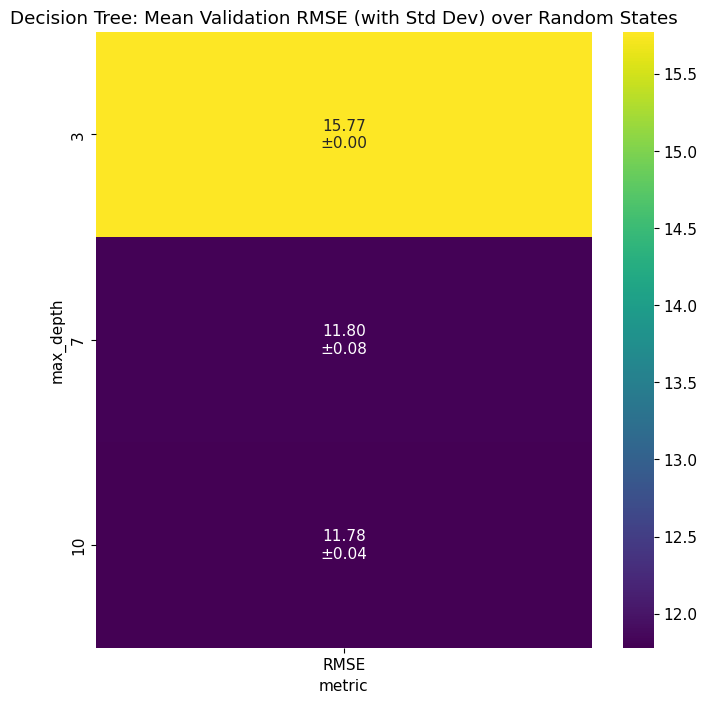

In [33]:
# Decision Tree Regression
tree_models = {}
tree_grids = {}
for rs in random_states:
    print(f'==== (Random State {rs}) ====')
    tree = DecisionTreeRegressor(random_state=rs)
    param_grid_tree = {
        'max_depth': [3, 7, 10],
    }
    grid_tree = GridSearchCV(tree, param_grid_tree, cv=cv_splits, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=True, n_jobs=1)
    grid_tree.fit(X_train_prep, y_train.to_numpy())
    print(f"Best parameters for random state {rs}: {grid_tree.best_params_}")
    best_model_tree = grid_tree.best_estimator_
    y_val_pred = best_model_tree.predict(X_val_prep)
    rmse = root_mean_squared_error(y_val.to_numpy(), y_val_pred)
    r2 = r2_score(y_val.to_numpy(), y_val_pred)
    print(f"Validation RMSE: {rmse:.4f}")
    print(f"Validation R2: {r2:.4f}")
    tree_models[rs] = best_model_tree
    tree_grids[rs] = grid_tree

# mean and std over random states
all_means = np.zeros((3, 1, len(random_states)))
max_depth_vals = [3, 7, 10]
for k, rs in enumerate(random_states):
    grid_tree = tree_grids[rs]
    results = pd.DataFrame(grid_tree.cv_results_)
    for i, depth in enumerate(max_depth_vals):
        mask = results['param_max_depth'] == depth
        all_means[i, 0, k] = results.loc[mask, 'mean_test_score'].values[0]
mean_test_scores = np.mean(all_means, axis=2)
std_test_scores = np.std(all_means, axis=2)

# plot heatmap of mean and std
labels = np.empty(mean_test_scores.shape, dtype=object)
for i in range(mean_test_scores.shape[0]):
    for j in range(mean_test_scores.shape[1]):
        labels[i, j] = f"{-mean_test_scores[i, j]:.2f}\n±{std_test_scores[i, j]:.2f}"
plt.figure(figsize=(8,8))
sns.heatmap(-mean_test_scores, annot=labels, fmt='', xticklabels=['RMSE'], yticklabels=max_depth_vals, cmap='viridis')
plt.title('Decision Tree: Mean Validation RMSE (with Std Dev) over Random States')
plt.xlabel('metric')
plt.ylabel('max_depth')
plt.show()

In [34]:
# calculate mean and std of validation RMSE across different random states
rmse_list = []
for rs in random_states:
    model = tree_models[rs]
    y_val_pred = model.predict(X_val_prep)
    rmse = root_mean_squared_error(y_val.to_numpy(), y_val_pred)
    rmse_list.append(rmse)
mean_rmse = np.mean(rmse_list)
std_rmse = np.std(rmse_list)
print(f"Mean Validation RMSE across random states: {mean_rmse:.4f}")
print(f"Std Dev of Validation RMSE across random states: {std_rmse:.4f}")
tree_random_state = random_states[np.argmin(rmse_list)]

Mean Validation RMSE across random states: 10.7703
Std Dev of Validation RMSE across random states: 0.2487


rmse mean: 10.852458367780603, rmse std: 0.3065956992268275


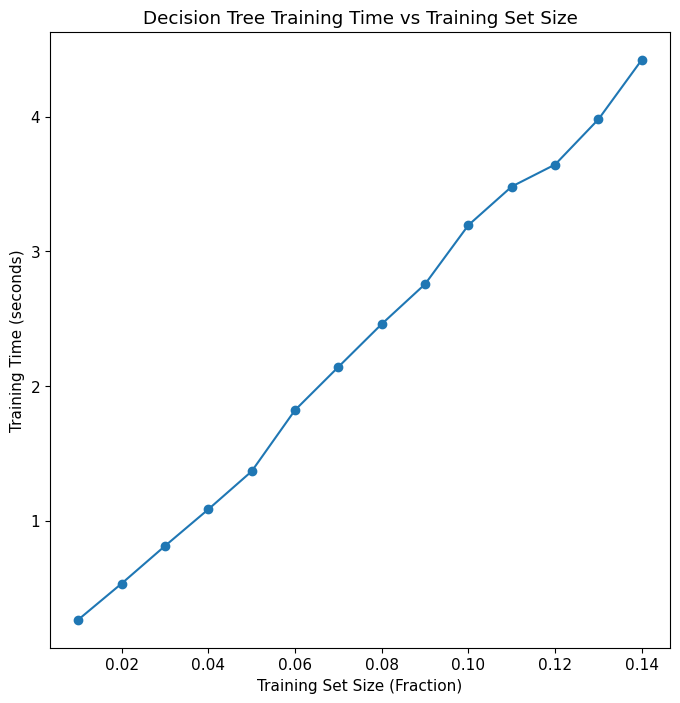

In [35]:
# train final model on successively larger subsets of the training data and evaluate on val set
tree_train_sizes = np.linspace(0.01, 0.14, 14)
tree_train_times = {}
tree_final_model = DecisionTreeRegressor(random_state=tree_random_state)
tree_best_params = tree_grids[tree_random_state].best_params_
tree_final_model.set_params(**tree_best_params)
rmse_list = []

for train_size in tree_train_sizes:
    tree_train_times[train_size] = []
    for trial in range(3):  # 3 trials for each train size
        subset_size = int(train_size * X_train_prep.shape[0])
        random_indices = np.random.choice(X_train_prep.shape[0], size=subset_size, replace=False)
        X_train_subset = X_train_prep[random_indices]
        y_train_subset = y_train.to_numpy()[random_indices]
        
        start_time = time.time()
        tree_final_model.fit(X_train_subset, y_train_subset)
        end_time = time.time()
        train_time = end_time - start_time
        tree_train_times[train_size].append(train_time)
        
        y_val_pred = tree_final_model.predict(X_val_prep)
        rmse = root_mean_squared_error(y_val.to_numpy(), y_val_pred)
        r2 = r2_score(y_val.to_numpy(), y_val_pred)
        rmse_list.append(rmse)

print(f"rmse mean: {np.mean(rmse_list)}, rmse std: {np.std(rmse_list)}")
# plot training time vs train size
plt.figure(figsize=(8,8))
plt.plot(tree_train_sizes, [np.mean(tree_train_times[size]) for size in tree_train_sizes], marker='o')
plt.xlabel('Training Set Size (Fraction)')
plt.ylabel('Training Time (seconds)')
plt.title('Decision Tree Training Time vs Training Set Size')
plt.show()


In [36]:
# final training on full training set and evaluation on test set
tree_final_model.fit(X_train_prep, y_train.to_numpy())
y_test_pred = tree_final_model.predict(X_test_prep)
rmse_test = root_mean_squared_error(y_test.to_numpy(), y_test_pred)
r2_test = r2_score(y_test.to_numpy(), y_test_pred)
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R2: {r2_test:.4f}")

Test RMSE: 10.5147
Test R2: 0.9282


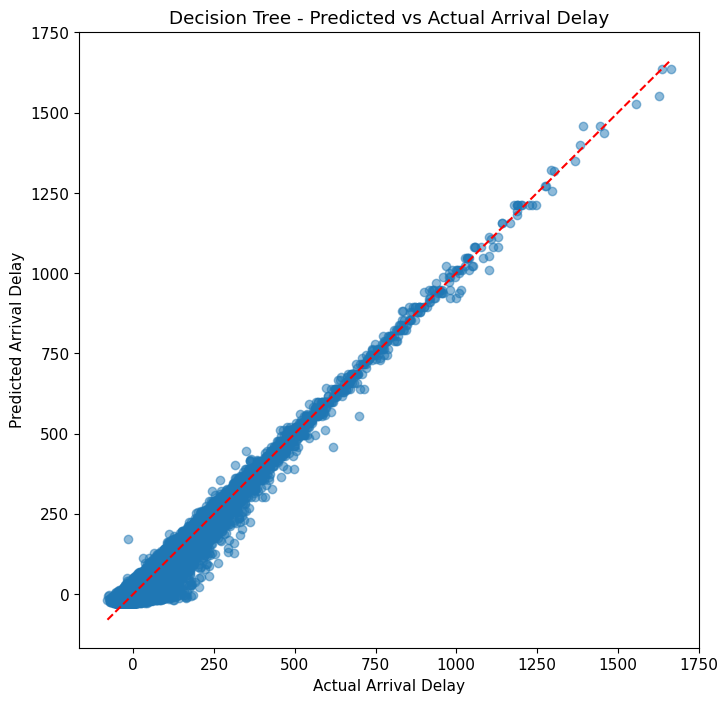

In [37]:
# scatter plot of predicted vs actual for all best models
y_test_pred = tree_final_model.predict(X_test_prep)
plt.figure(figsize=(8,8))
plt.scatter(y_test.to_numpy(), y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title(f'Decision Tree - Predicted vs Actual Arrival Delay')
plt.show()

In [38]:
# use 1% of test set
X_test_sample = X_test_prep[:int(0.01 * X_test_prep.shape[0])]
y_test_sample = y_test.to_numpy()[:int(0.01 * y_test.shape[0])]

perturbation_results = sparse_permutation_importance(tree_final_model, X_test_sample, y_test_sample, n_repeats=3, random_state=42)
importances = perturbation_results['importances']
importances_mean = perturbation_results['importances_mean']
importances_std = perturbation_results['importances_std']

Processing column 0/65
Processing column 30/65
Processing column 60/65


<Figure size 1000x600 with 0 Axes>

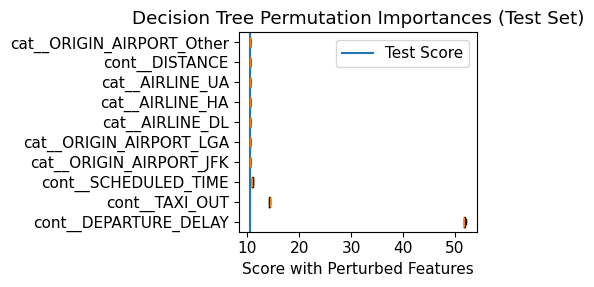

In [39]:
# get feature names from pipeline
feature_names = pipeline.get_feature_names_out()
rmse_test_sample = root_mean_squared_error(y_test_sample, tree_final_model.predict(X_test_sample))
# sort importances
sorted_indices = np.argsort(importances_mean)[::-1]
top_10 = sorted_indices[:10]
# plot top 20 feature importances
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(5,3))
plt.boxplot(importances[top_10].T,tick_labels=feature_names[top_10],vert=False)
plt.axvline(rmse_test_sample,label='Test Score')
plt.title("Decision Tree Permutation Importances (Test Set)")
plt.xlabel('Score with Perturbed Features')
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
joblib.dump(tree_final_model, 'models/final_model_tree.pkl')

['models/final_model_tree.pkl']

# XGBoost

==== (Random State 17) ====
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best parameters for random state 17: max_depth=6, subsample=0.5
Validation RMSE: 11.4107
Validation R2: 0.9156
==== (Random State 42) ====
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best parameters for random state 42: max_depth=6, subsample=0.5
Validation RMSE: 12.3718
Validation R2: 0.9007
==== (Random State 774) ====
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best parameters for random state 774: max_depth=6, subsample=0.5
Validation RMSE: 11.7299
Validation R2: 0.9108
==== (Random State 1012) ====
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best parameters for random state 1012: max_depth=6, subsample=0.5
Validation RMSE: 12.2824
Validation R2: 0.9022


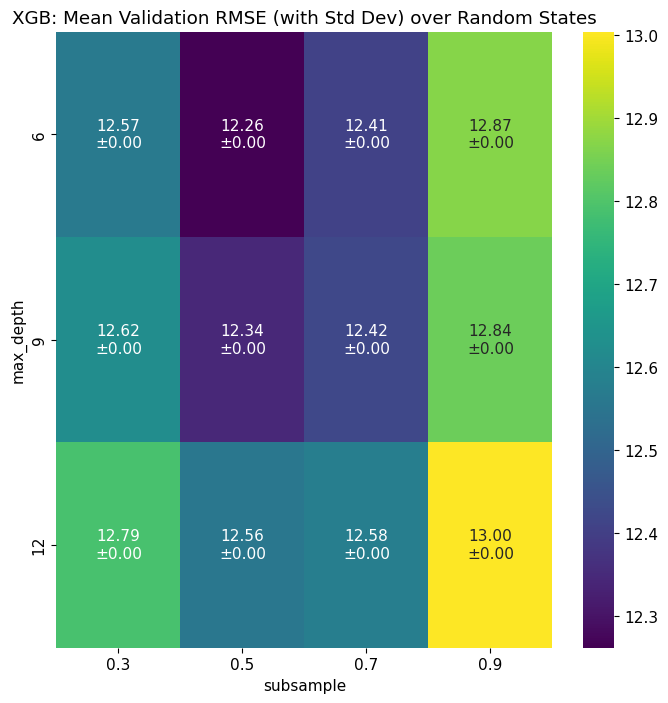

In [49]:
# XGBoost
xgb_models = {}
max_depth_values = [6, 9, 12]
subsample_values = [0.3, 0.5, 0.7, 0.9]
results = []
for rs in random_states:
    print(f'==== (Random State {rs}) ====')
    print(f"Fitting {len(cv_splits)} folds for each of {len(max_depth_values) * len(subsample_values)} candidates, totalling {len(cv_splits) * len(max_depth_values) * len(subsample_values)} fits")
    models = {}
    for max_depth in max_depth_values:
        for subsample in subsample_values:
            fold_rmse = []
            fold_models = []
            for train_idx, val_idx in cv_splits:
                X_cur_train, X_cur_val = X_train_prep[train_idx], X_train_prep[val_idx]
                y_cur_train, y_cur_val = y_train.to_numpy()[train_idx], y_train.to_numpy()[val_idx]
                xgb = XGBRegressor(tree_method="hist", 
                                enable_categorical=False, 
                                random_state=rs, 
                                n_jobs=-1, 
                                n_estimators=1000, 
                                max_depth=max_depth, 
                                learning_rate=0.1,
                                early_stopping_rounds=10,
                                subsample=subsample,
                                eval_metric='rmse')
                xgb.fit(X_cur_train, y_cur_train,
                        eval_set=[(X_cur_val, y_cur_val)],
                        verbose=False)
                n_estimators = xgb.best_iteration + 1
                preds = xgb.predict(X_cur_val)
                rmse = root_mean_squared_error(y_cur_val, preds)
                fold_rmse.append(rmse)
                fold_models.append(xgb)
            mean_rmse = np.mean(fold_rmse)
            std_rmse = np.std(fold_rmse)
            results.append({
                'random_state': rs,
                'max_depth': max_depth,
                'subsample': subsample,
                'mean_rmse': mean_rmse,
                'std_rmse': std_rmse,
                'n_estimators': n_estimators,
            })
            models[(max_depth, subsample)] = fold_models[np.argmin(fold_rmse)]
    # find best hyperparameters for this random state
    best_rmse = np.inf
    for dct in results:
        if dct['random_state'] == rs and dct['mean_rmse'] < best_rmse:
            best_rmse = dct['mean_rmse']
            best_params = (dct['max_depth'], dct['subsample'])
    print(f"Best parameters for random state {rs}: max_depth={best_params[0]}, subsample={best_params[1]}")
    best_model_xgb = models[best_params]
    y_val_pred = best_model_xgb.predict(X_val_prep)
    rmse = root_mean_squared_error(y_val.to_numpy(), y_val_pred)
    r2 = r2_score(y_val.to_numpy(), y_val_pred)
    print(f"Validation RMSE: {rmse:.4f}")
    print(f"Validation R2: {r2:.4f}")
    xgb_models[rs] = best_model_xgb
results_df = pd.DataFrame(results)


# mean and std over random states
all_means = np.zeros((3, 4, len(random_states)))
for k, rs in enumerate(random_states):
    for i, max_depth in enumerate(max_depth_values):
        for j, subsample in enumerate(subsample_values):
            all_means[i, j, k] = results_df.loc[(results_df['max_depth'] == max_depth) & (results_df['subsample'] == subsample)]['mean_rmse'].mean()
mean_test_scores = np.mean(all_means, axis=2)
std_test_scores = np.std(all_means, axis=2)

# plot heatmap of mean and std
labels = np.empty(mean_test_scores.shape, dtype=object)
for i in range(mean_test_scores.shape[0]):
    for j in range(mean_test_scores.shape[1]):
        labels[i, j] = f"{mean_test_scores[i, j]:.2f}\n±{std_test_scores[i, j]:.2f}"
plt.figure(figsize=(8,8))
sns.heatmap(mean_test_scores, annot=labels, fmt='', xticklabels=np.round(subsample_values, 2), yticklabels=np.round(max_depth_values, 2), cmap='viridis')
plt.title('XGB: Mean Validation RMSE (with Std Dev) over Random States')
plt.xlabel('subsample')
plt.ylabel('max_depth')
plt.show()


In [50]:
# calculate mean and std of validation RMSE across different random states
rmse_list = []
for rs in random_states:
    model = xgb_models[rs]
    y_val_pred = model.predict(X_val_prep)
    rmse = root_mean_squared_error(y_val.to_numpy(), y_val_pred)
    rmse_list.append(rmse)
mean_rmse = np.mean(rmse_list)
std_rmse = np.std(rmse_list)
print(f"Mean Validation RMSE across random states: {mean_rmse:.4f}")
print(f"Std Dev of Validation RMSE across random states: {std_rmse:.4f}")
xgb_random_state = random_states[np.argmin(rmse_list)]

Mean Validation RMSE across random states: 11.9487
Std Dev of Validation RMSE across random states: 0.3961


rmse mean: 11.084507079351516, rmse std: 0.906061824079826


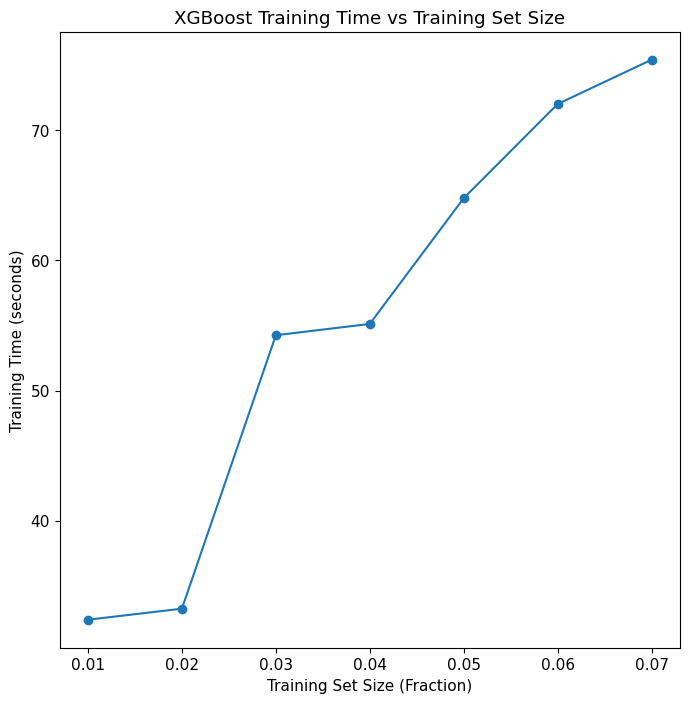

In [53]:
# train final model on successively larger subsets of the training data and evaluate on val set
xgb_train_sizes = np.linspace(0.01, 0.07, 7)
xgb_train_times = {}
xgb_final_model = XGBRegressor(tree_method="hist",
                               random_state=xgb_random_state,
                               enable_categorical=False, 
                               n_jobs=-1, 
                               n_estimators=1000, 
                               learning_rate=0.1, 
                               early_stopping_rounds=10, 
                               eval_metric='rmse',
                               max_depth=best_params[0],
                               subsample=best_params[1])
rmse_list = []

for train_size in xgb_train_sizes:
    xgb_train_times[train_size] = []
    for trial in range(3):  # 3 trials for each train size
        subset_size = int(train_size * X_train_prep.shape[0])
        random_indices = np.random.choice(X_train_prep.shape[0], size=subset_size, replace=False)
        X_train_subset = X_train_prep[random_indices]
        y_train_subset = y_train.to_numpy()[random_indices]
        
        start_time = time.time()
        xgb_final_model.fit(X_train_subset, y_train_subset, eval_set=[(X_val_prep, y_val.to_numpy())], verbose=False)
        end_time = time.time()
        train_time = end_time - start_time
        xgb_train_times[train_size].append(train_time)
        
        y_val_pred = xgb_final_model.predict(X_val_prep)
        rmse = root_mean_squared_error(y_val.to_numpy(), y_val_pred)
        r2 = r2_score(y_val.to_numpy(), y_val_pred)
        rmse_list.append(rmse)

print(f"rmse mean: {np.mean(rmse_list)}, rmse std: {np.std(rmse_list)}")
# plot training time vs train size
plt.figure(figsize=(8,8))
plt.plot(xgb_train_sizes, [np.mean(xgb_train_times[size]) for size in xgb_train_sizes], marker='o')
plt.xlabel('Training Set Size (Fraction)')
plt.ylabel('Training Time (seconds)')
plt.title('XGBoost Training Time vs Training Set Size')
plt.show()


In [55]:
# final training on full training set and evaluation on test set
xgb_final_model.fit(X_train_prep, y_train.to_numpy(), eval_set=[(X_val_prep, y_val.to_numpy())], verbose=False)
y_test_pred = xgb_final_model.predict(X_test_prep)
rmse_test = root_mean_squared_error(y_test.to_numpy(), y_test_pred)
r2_test = r2_score(y_test.to_numpy(), y_test_pred)
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R2: {r2_test:.4f}")

Test RMSE: 9.4666
Test R2: 0.9418


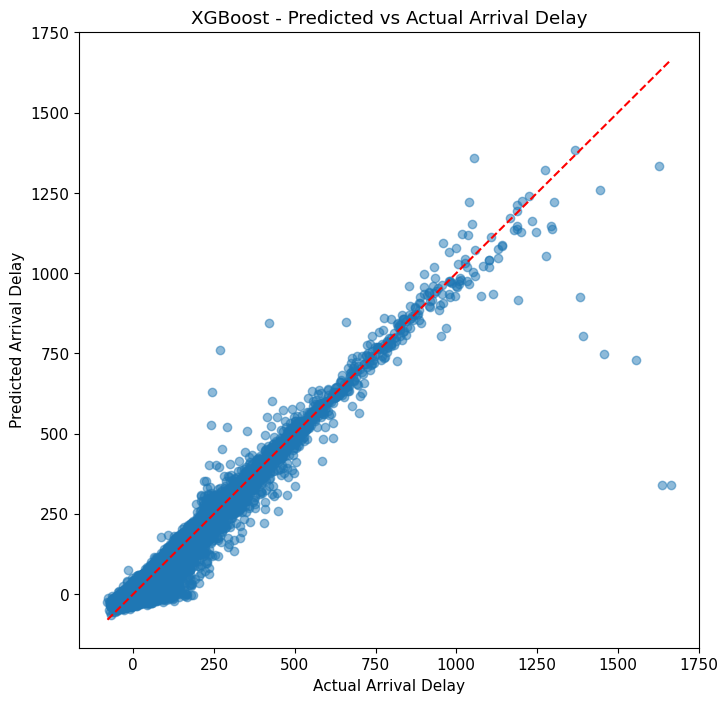

In [56]:
# scatter plot of predicted vs actual for all best models
y_test_pred = xgb_final_model.predict(X_test_prep)
plt.figure(figsize=(8,8))
plt.scatter(y_test.to_numpy(), y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title(f'XGBoost - Predicted vs Actual Arrival Delay')
plt.show()

In [57]:
# use 1% of test set
X_test_sample = X_test_prep[:int(0.01 * X_test_prep.shape[0])]
y_test_sample = y_test.to_numpy()[:int(0.01 * y_test.shape[0])]

perturbation_results = sparse_permutation_importance(xgb_final_model, X_test_sample, y_test_sample, n_repeats=3, random_state=42)
importances = perturbation_results['importances']
importances_mean = perturbation_results['importances_mean']
importances_std = perturbation_results['importances_std']

Processing column 0/65
Processing column 30/65
Processing column 60/65


<Figure size 1000x600 with 0 Axes>

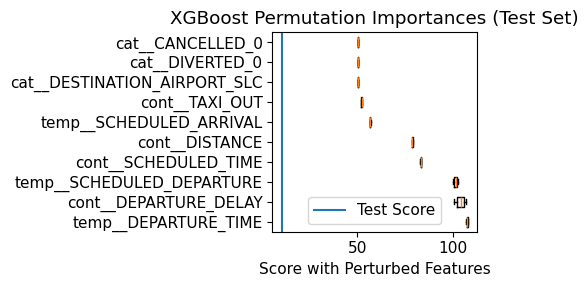

In [60]:
# get feature names from pipeline
feature_names = pipeline.get_feature_names_out()
rmse_test_sample = root_mean_squared_error(y_test_sample, tree_final_model.predict(X_test_sample))
# sort importances
sorted_indices = np.argsort(importances_mean)[::-1]
top_10 = sorted_indices[:10]
# plot top 20 feature importances
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(5,3))
plt.boxplot(importances[top_10].T,tick_labels=feature_names[top_10],vert=False)
plt.axvline(rmse_test_sample,label='Test Score')
plt.title("XGBoost Permutation Importances (Test Set)")
plt.xlabel('Score with Perturbed Features')
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
joblib.dump(xgb_final_model, 'models/final_model_xgb.pkl')

['models/final_model_xgb.pkl']

# Comparison

In [62]:
# baseline prediction
baseline_pred = np.full(shape=y_test.shape, fill_value=y_train.mean())
baseline_rmse = root_mean_squared_error(y_test.to_numpy(), baseline_pred)
baseline_r2 = r2_score(y_test.to_numpy(), baseline_pred)
print(f"Baseline Test RMSE: {baseline_rmse:.4f}")
print(f"Baseline Test R2: {baseline_r2:.4f}")
# all best models
for model, name in [(elastic_net_final_model, "Elastic Net"), (svm_final_model, "SVR"), (tree_final_model, "Decision Tree"), (xgb_final_model, "XGB")]:
    y_test_pred = model.predict(X_test_prep)
    test_rmse = root_mean_squared_error(y_test.to_numpy(), y_test_pred)
    test_r2 = r2_score(y_test.to_numpy(), y_test_pred)
    print(f"{name} Test RMSE: {test_rmse:.4f}")
    print(f"{name} Test R2: {test_r2:.4f}")

Baseline Test RMSE: 39.2402
Baseline Test R2: -0.0000
Elastic Net Test RMSE: 9.5827
Elastic Net Test R2: 0.9404
SVR Test RMSE: 9.6204
SVR Test R2: 0.9399
Decision Tree Test RMSE: 10.5147
Decision Tree Test R2: 0.9282
XGB Test RMSE: 9.4666
XGB Test R2: 0.9418


SHAP Waterfall Plot for Elastic Net, Test Sample 1


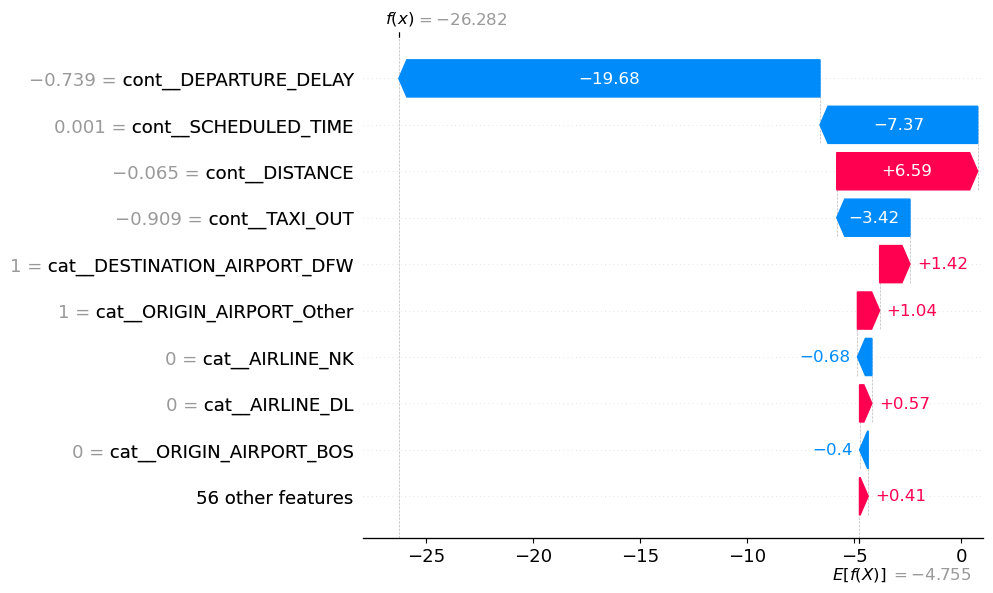

SHAP Waterfall Plot for Elastic Net, Test Sample 2


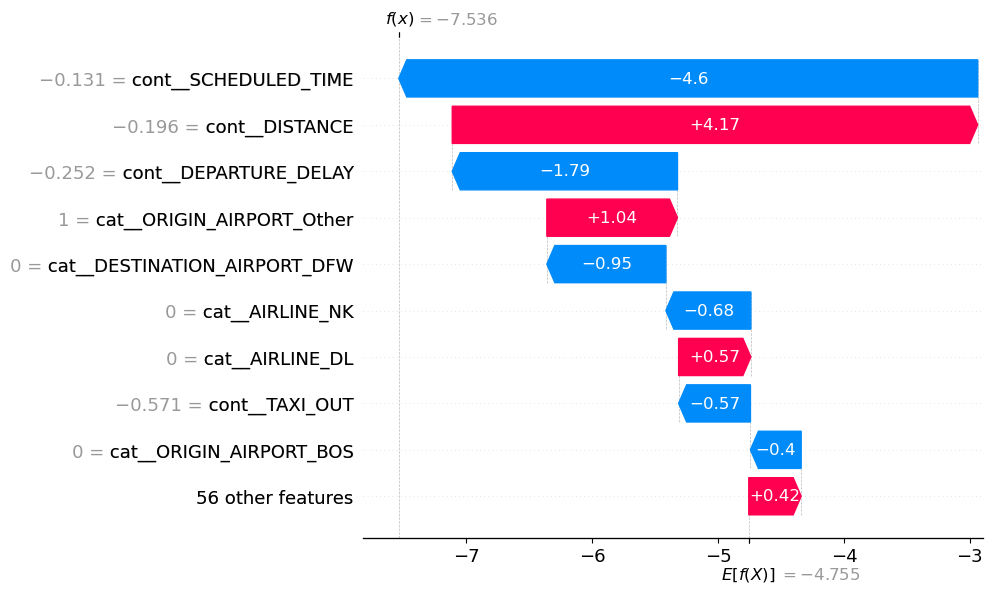

SHAP Waterfall Plot for Elastic Net, Test Sample 3


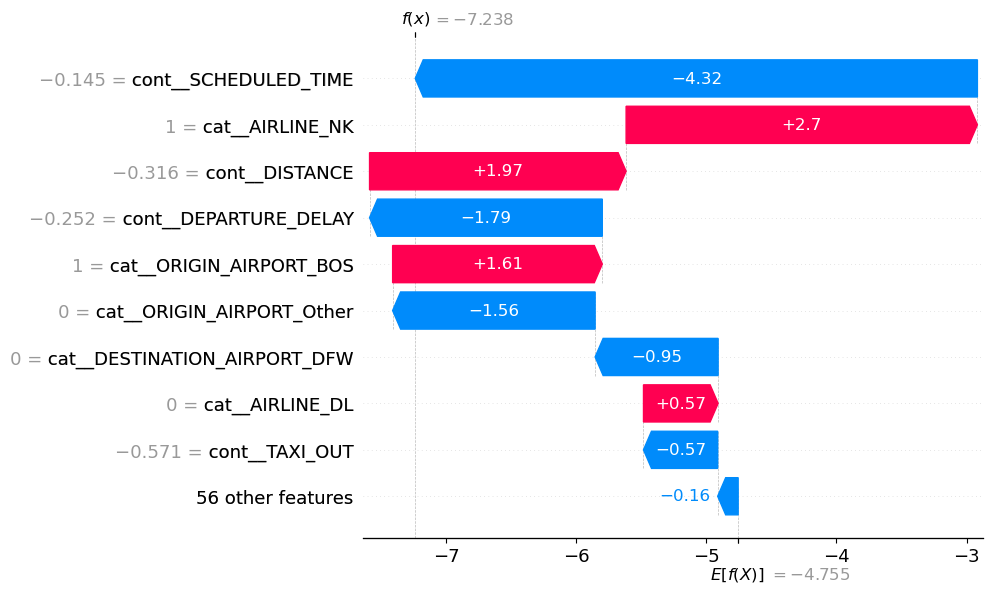

SHAP Waterfall Plot for Elastic Net, Test Sample 4


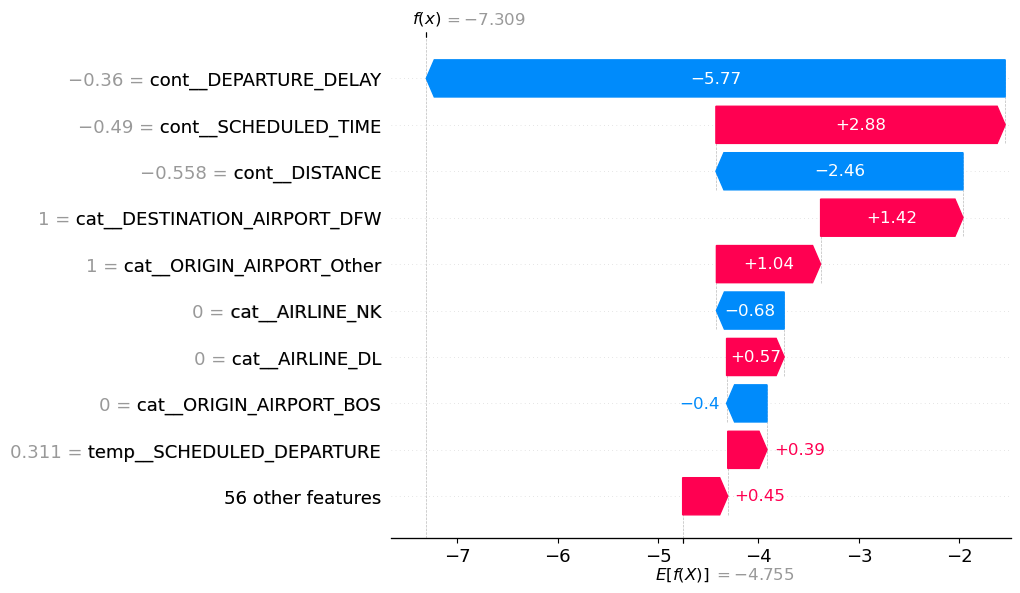

SHAP Waterfall Plot for Elastic Net, Test Sample 5


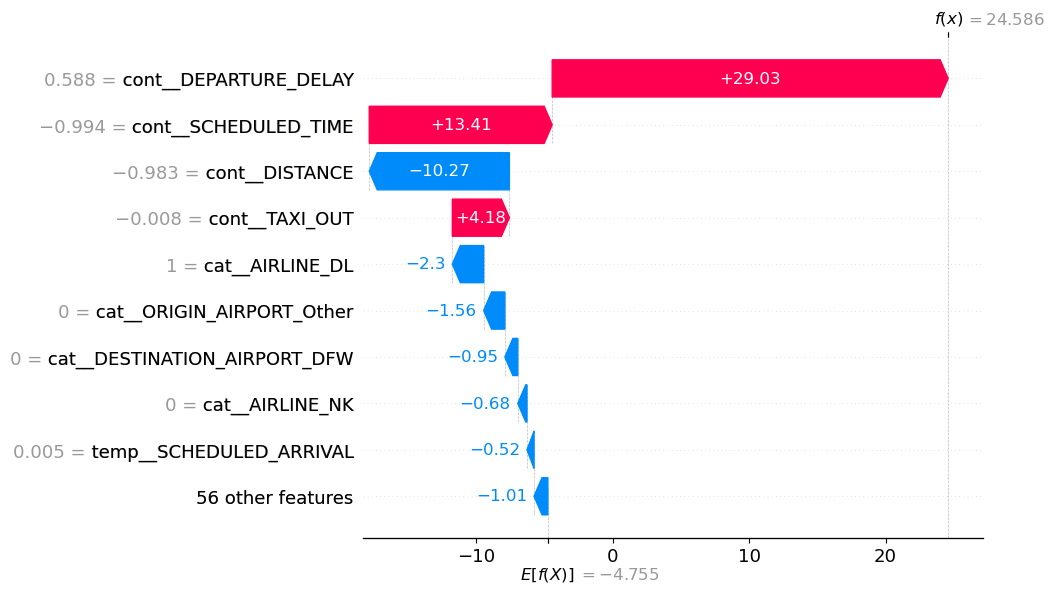

SHAP Waterfall Plot for SVR, Test Sample 1


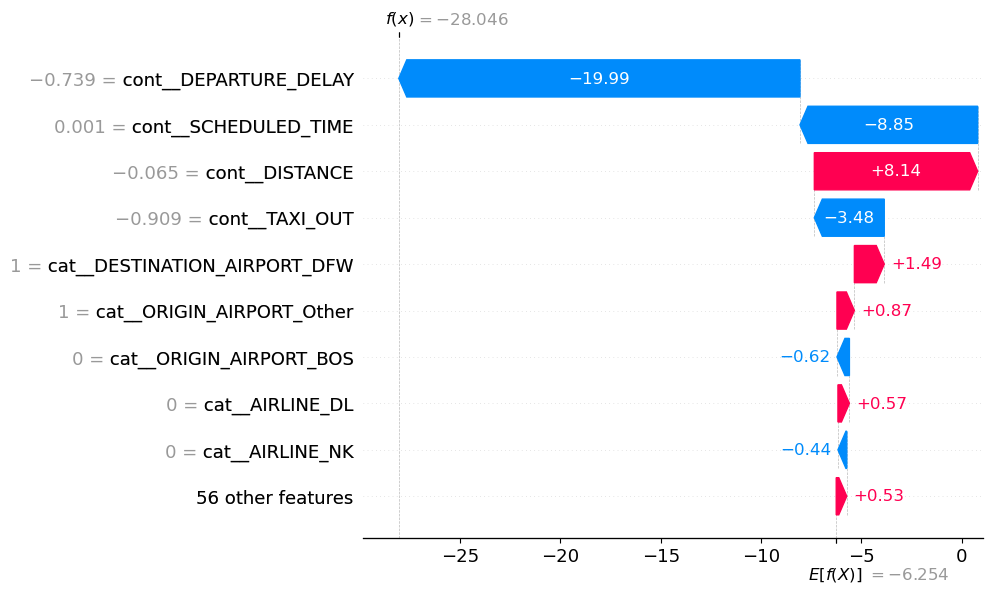

SHAP Waterfall Plot for SVR, Test Sample 2


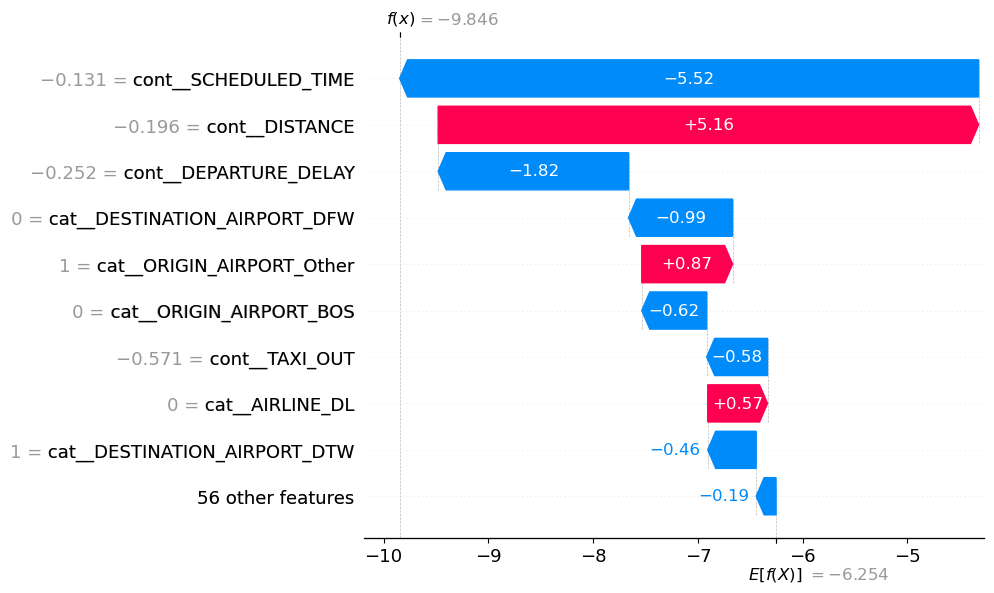

SHAP Waterfall Plot for SVR, Test Sample 3


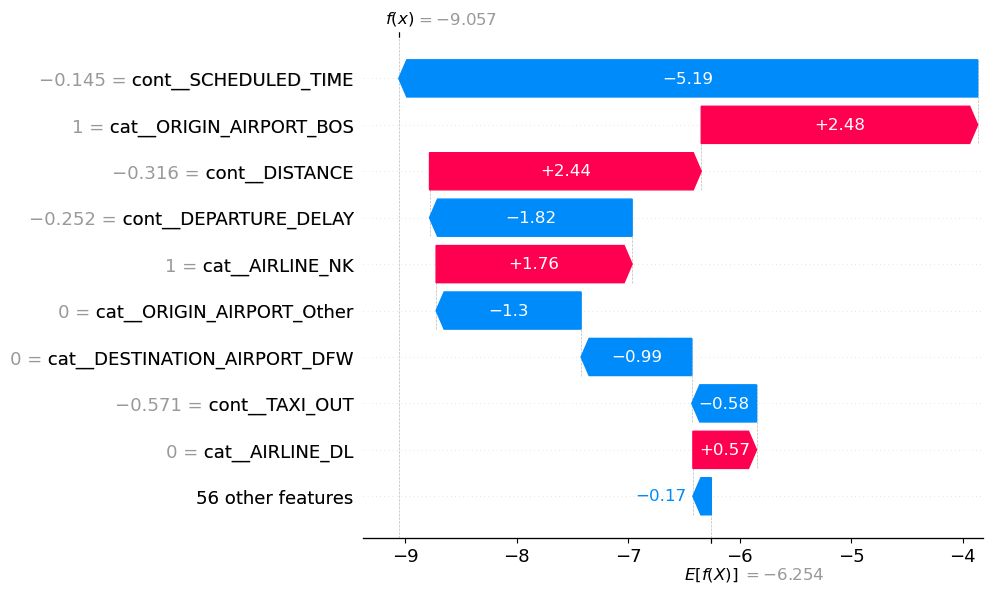

SHAP Waterfall Plot for SVR, Test Sample 4


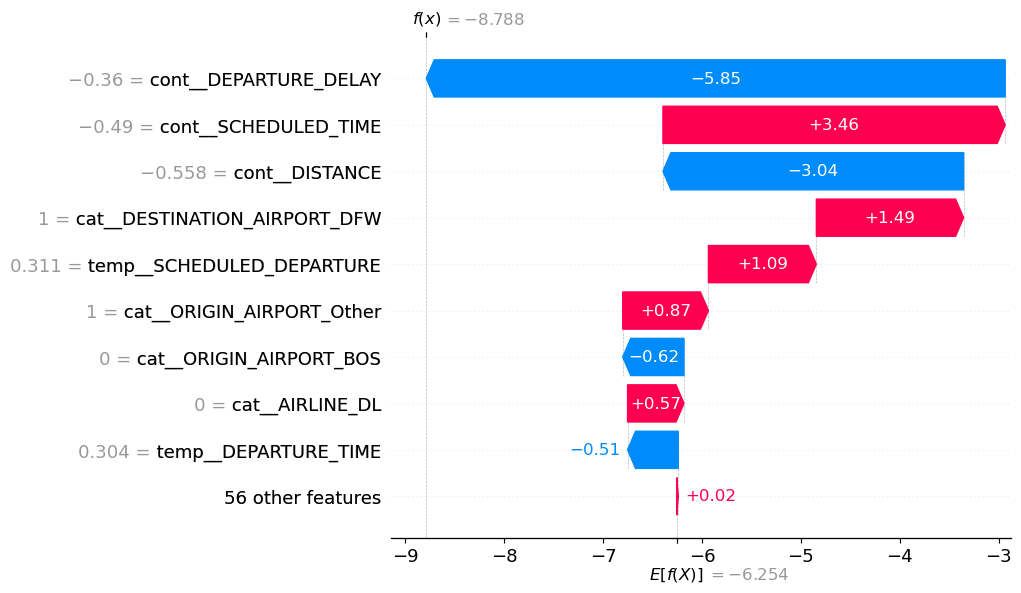

SHAP Waterfall Plot for SVR, Test Sample 5


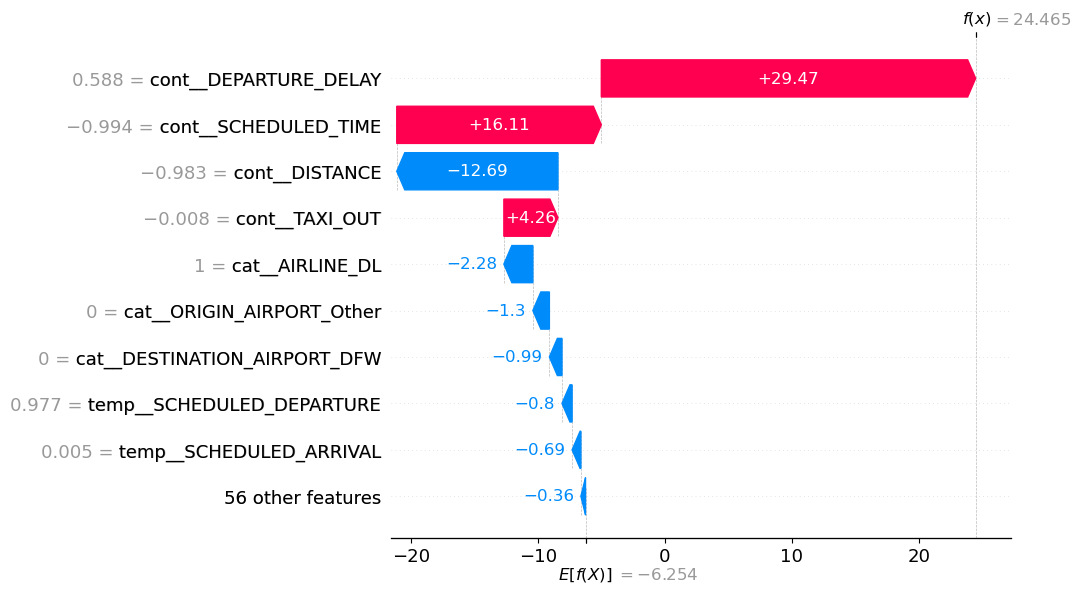

SHAP Waterfall Plot for Decision Tree, Test Sample 1


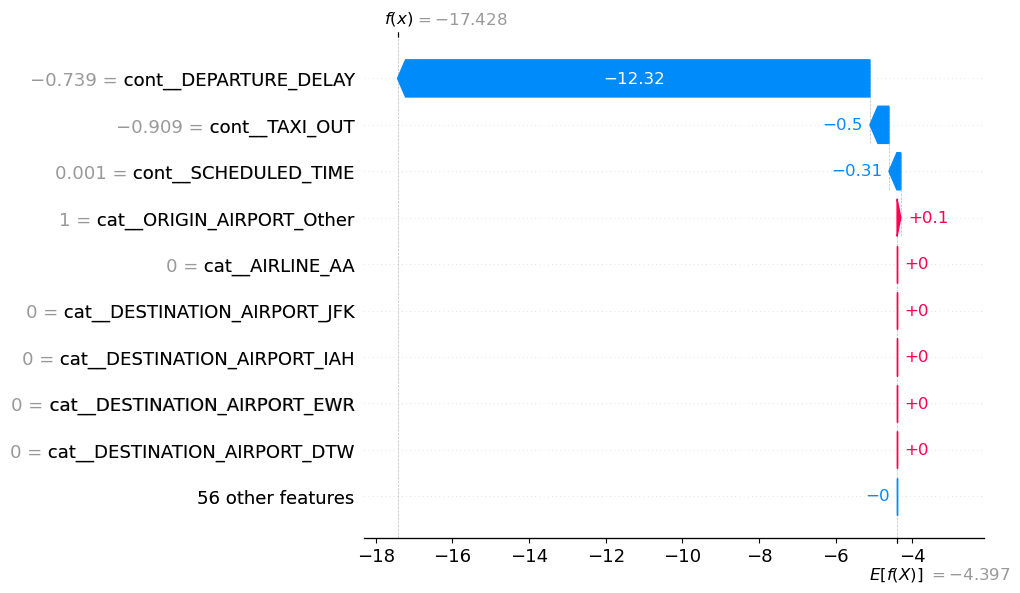

SHAP Waterfall Plot for Decision Tree, Test Sample 2


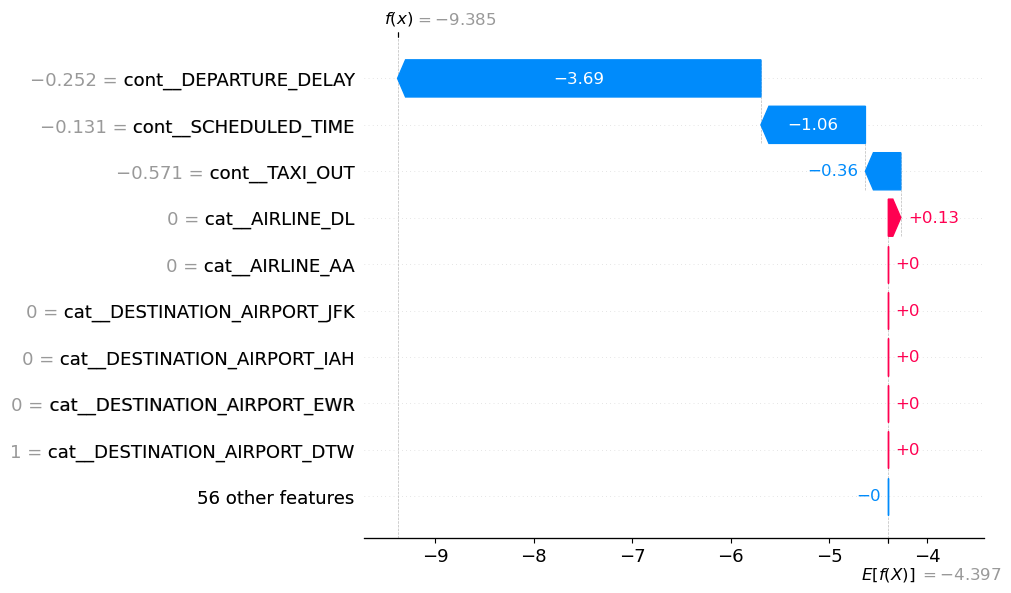

SHAP Waterfall Plot for Decision Tree, Test Sample 3


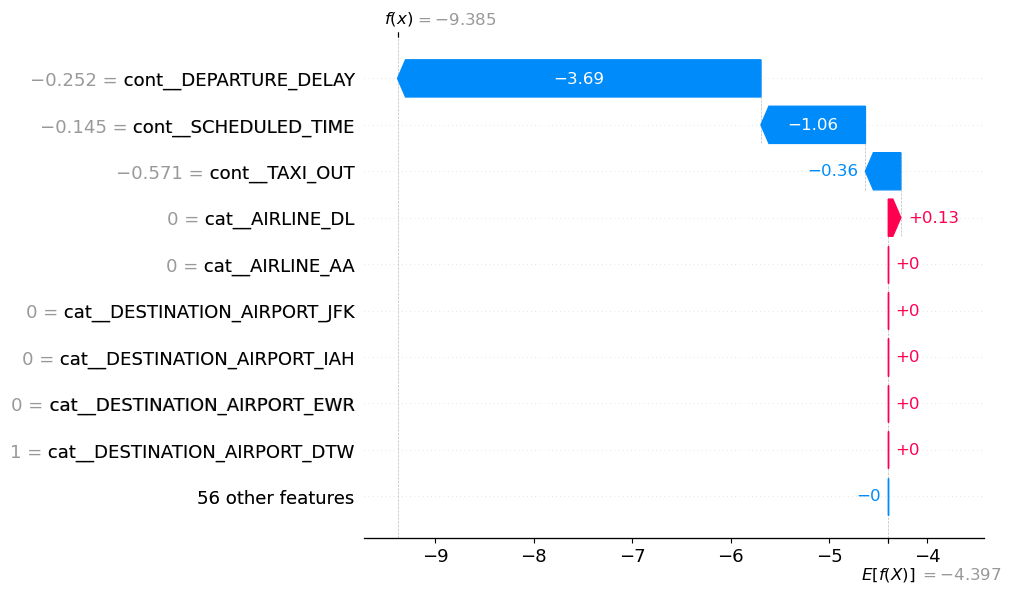

SHAP Waterfall Plot for Decision Tree, Test Sample 4


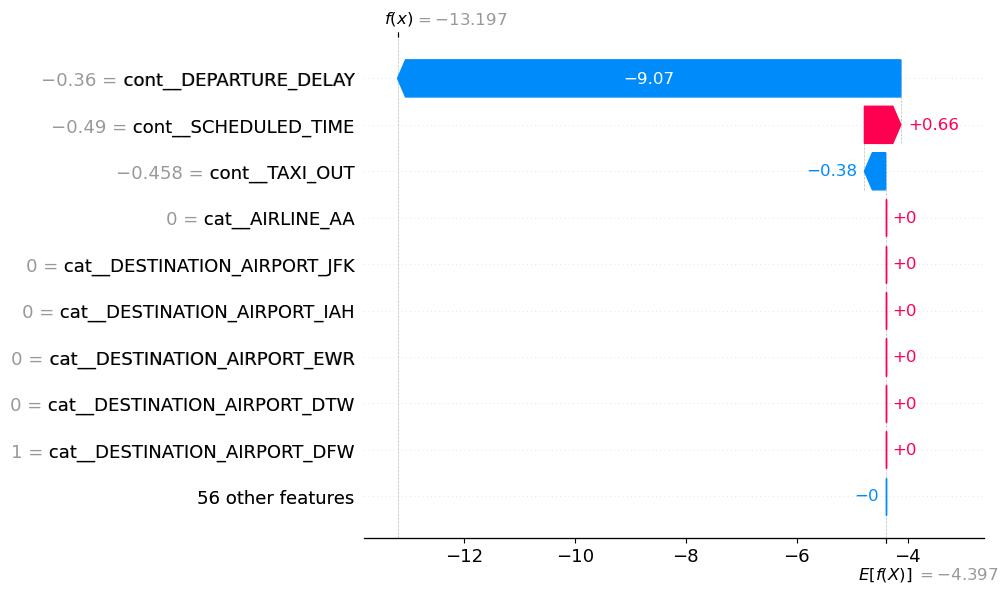

SHAP Waterfall Plot for Decision Tree, Test Sample 5


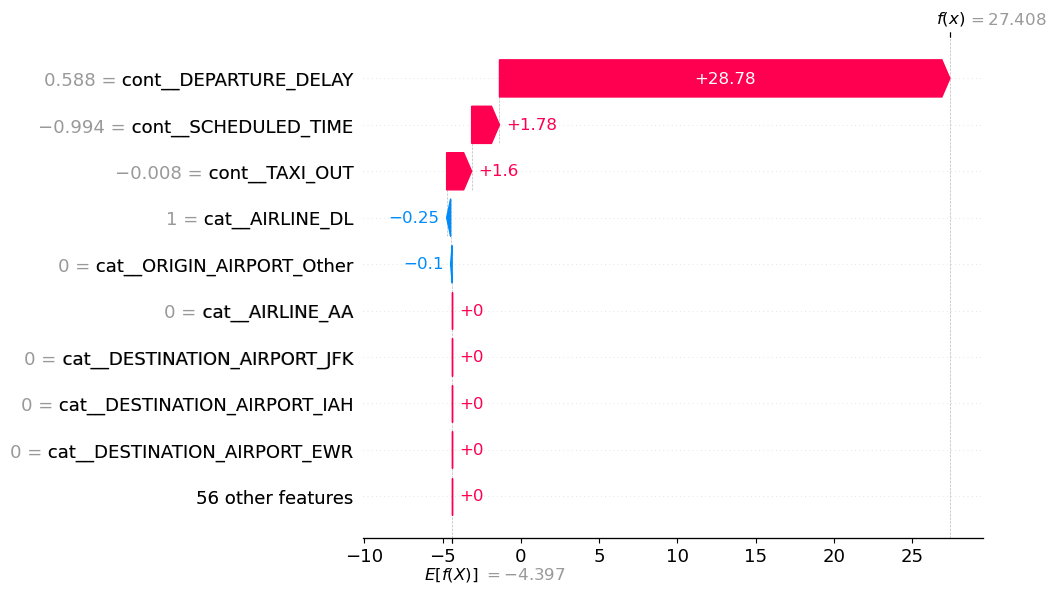

SHAP Waterfall Plot for XGB, Test Sample 1


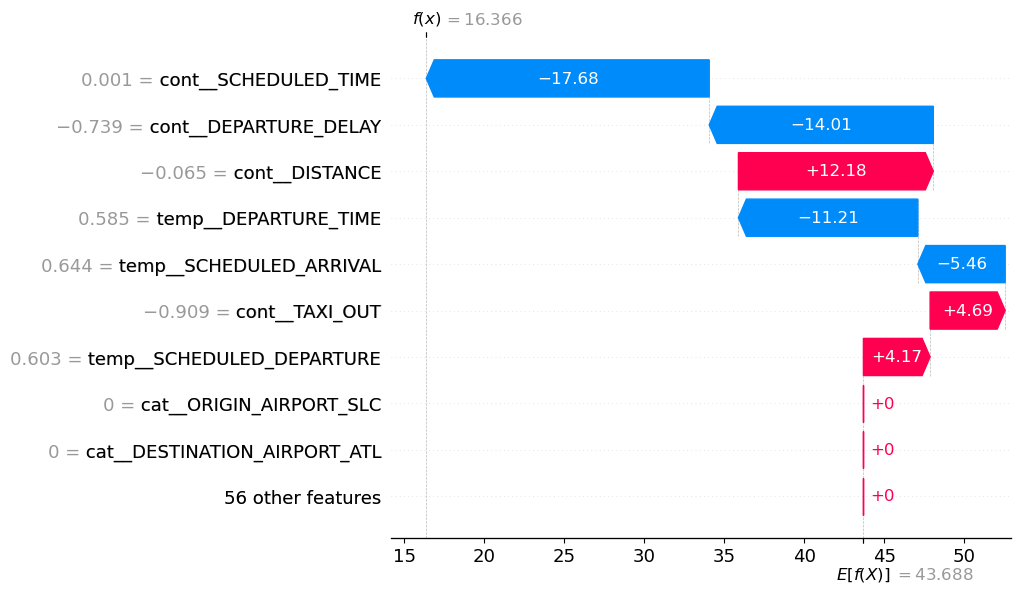

SHAP Waterfall Plot for XGB, Test Sample 2


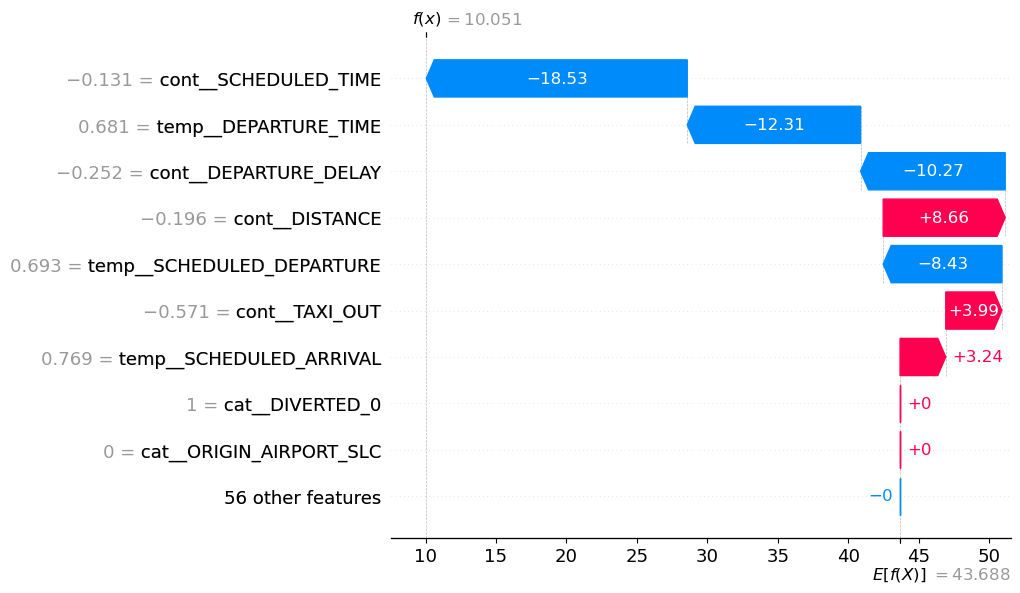

SHAP Waterfall Plot for XGB, Test Sample 3


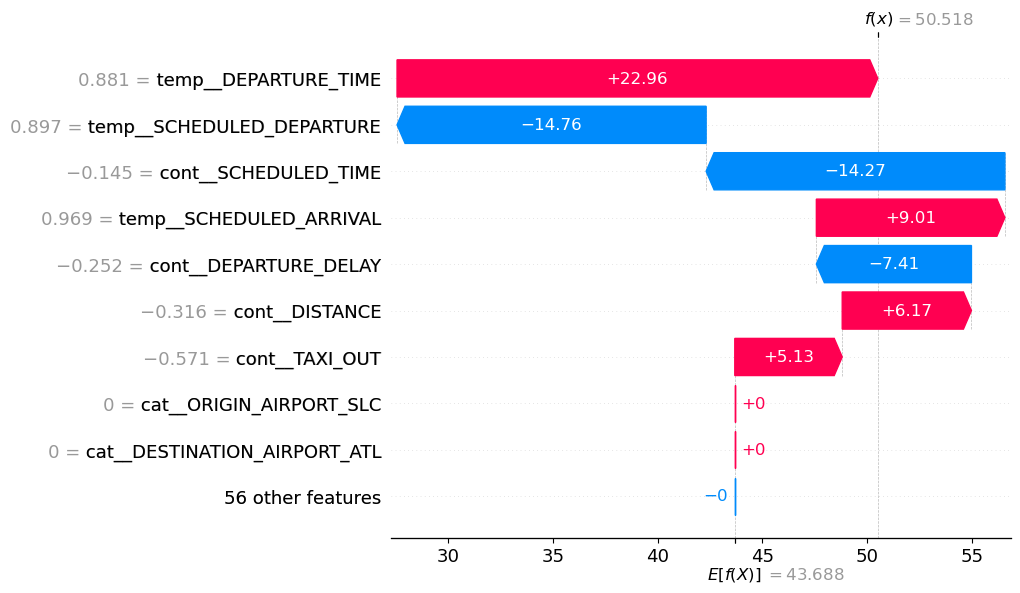

SHAP Waterfall Plot for XGB, Test Sample 4


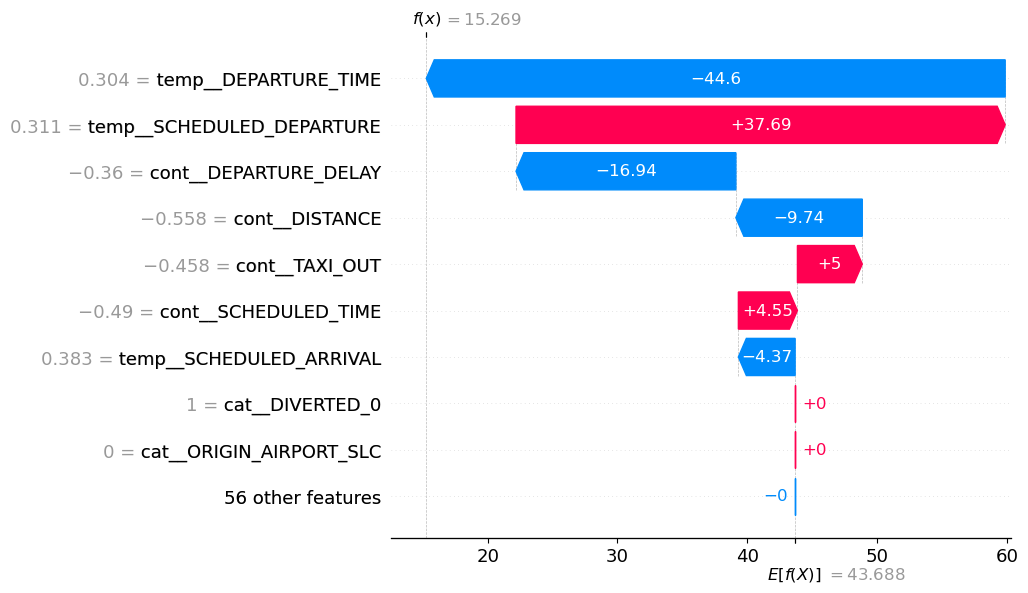

SHAP Waterfall Plot for XGB, Test Sample 5


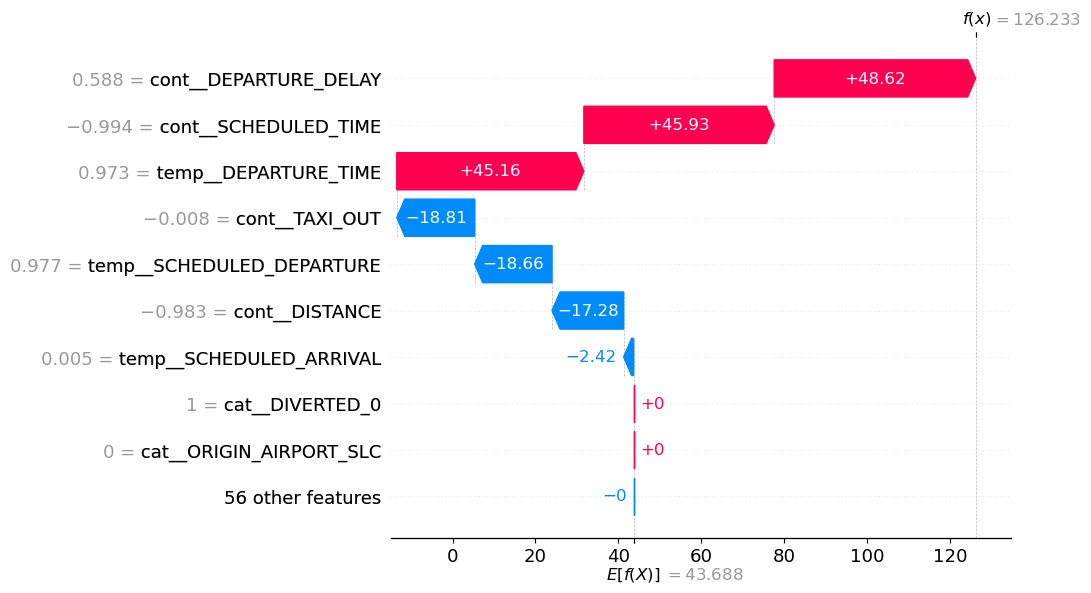

In [94]:
# Do SHAP analysis on 5 random test samples
import shap
shap.initjs()

rng = np.random.default_rng(42)
samples = rng.choice(X_test_prep.shape[0], size=5, replace=False)
X_test_shap = X_test_prep[samples]
X_test_shap = X_test_shap.toarray()
X_test_shap_df = pd.DataFrame(X_test_shap, columns=feature_names)

for model, name in [(elastic_net_final_model, "Elastic Net"), (svm_final_model, "SVR"), (tree_final_model, "Decision Tree"), (xgb_final_model, "XGB")]:
    explainer = shap.Explainer(model, X_test_shap_df)
    shap_values = explainer(X_test_shap_df)
    for i in range(X_test_shap_df.shape[0]):
        print(f"SHAP Waterfall Plot for {name}, Test Sample {i + 1}")
        shap.plots.waterfall(shap_values[i], max_display=10)